In [1]:
import os, sys, argparse, cv2, numpy as np
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from trafficbehavior.common import image_util
from trafficbehavior.common import io_util
from trafficbehavior.common import IPM
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
from IPython import display
import time

In [173]:
#relativepath = 'validation/v1_shadows_low_gray'
# relativepath = 'validation/v11_shadows_med_black'
relativepath = 'validation/v3_shadows_med_gray'
# relativepath = 'validation/v6_bright_med_gray'
relativepath = 'validation/v7_bright_med_black'
lanes_fn = 'nearby_lanes.json'
vp_fn = 'vp.json'
filenames = io_util.load_fnames(relativepath)
fname_lanes_dict = io_util.load_json(relativepath, lanes_fn)
vp_dict = io_util.load_json(relativepath, vp_fn)
vp = vp_dict['vp']

In [174]:
initimg = cv2.imread(os.path.join(relativepath, filenames[0]), cv2.IMREAD_GRAYSCALE)
imgshape = initimg.shape
imgheight, imgwidth = imgshape
origPts, destPts = image_util.locateROI(imgshape, x_frac=1/3., 
                                        y_frac_top=1/25., y_frac_bot=1/6., 
                                        vp=vp)

ipm = IPM.IPM(imgshape, imgshape, origPts, destPts)

getPersectiveTransform time: 6.69956207275e-05
find inv transform time: 0.000565052032471
matrix maps time: 0.052020072937


In [175]:
lpts = []
rpts = []
for i in range(0, 900):
    fname = filenames[i]
    if fname in fname_lanes_dict:
        lanes = fname_lanes_dict[fname]
        j = 0
        for lane in lanes:
            [x1, y1] = ipm.pointToIPM(lane[0])
            [x2, y2] = ipm.pointToIPM(lane[1])
            if j == 0:
                lpts.append((x1 + x2) / 2)
                j = 1
            else:
                rpts.append((x1 + x2) / 2)
    else:
        lpts.append(None)
        rpts.append(None)
# plt.title(fname)
# plt.ylim([-20, 20])
# plt.xlim([0, 640])
# display.clear_output(wait=True)
# display.display(plt.gcf())

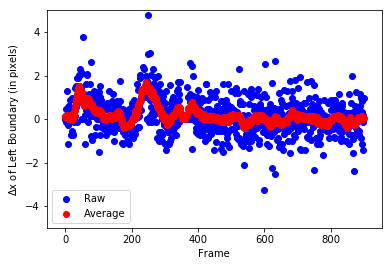

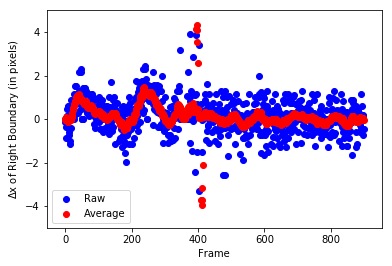

In [177]:
l = []
r = []
window_size = 1
for i in range(len(lpts)):
    if i < window_size:
        l.append(0)
    elif lpts[i] is None or lpts[i - window_size] is None:
        l.append(0)
    else:
        l.append(lpts[i] - lpts[i - window_size])
l = np.array(l)

for i in range(len(rpts)):
    if i < window_size:
        r.append(0)
    elif rpts[i] is None or rpts[i - window_size] is None:
        r.append(0)
    else:
        r.append(rpts[i] - rpts[i - window_size])
r = np.array(r)

def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'same')
    return sma

plt.figure(1)
plt.scatter(np.arange(l.shape[0]), l, color='b', label='Raw')
plt.scatter(np.arange(l.shape[0]), movingaverage(l, 15), color='r', label='Average')
plt.ylim([-5,5])
plt.xlabel('Frame')
plt.ylabel('$\Delta$x of Left Boundary (in pixels)')
plt.legend(loc='lower left')
plt.show()

plt.figure(2)
plt.scatter(np.arange(r.shape[0]), r, color='b', label='Raw')
plt.scatter(np.arange(r.shape[0]), movingaverage(r, 15), color='r', label='Average')
plt.xlabel('Frame')
plt.ylabel('$\Delta$x of Right Boundary (in pixels)')
plt.legend(loc='lower left')
plt.ylim([-5,5])
plt.show()


In [163]:
# x = np.arange(y.shape[0])
# avgy = movingaverage(y, 15)
# print x.shape
# print avgy.shape
# def ransac_fit(rX, rY, degree):
#     estimator = Ridge() #RANSACRegressor(random_state=42, min_samples=3)
#     model = make_pipeline(PolynomialFeatures(3), estimator)
#     model.fit(rX.reshape(-1, 1), rY.reshape(-1, 1))
#     fitY = model.predict(rX.reshape(-1, 1))
#     return fitY
# y_new = ransac_fit(x, avgy, 3)
# plt.figure(1)
# plt.scatter(np.arange(y.shape[0]), y, color='b')
# plt.scatter(np.arange(y.shape[0]), movingaverage(y, 15), color='r')
# plt.scatter(np.arange(y.shape[0]), y_new, color='g')
# plt.ylim([-5,5])
# plt.show()

# Following

In [2]:
from trafficbehavior.apps import Following

In [32]:
from scipy.stats.stats import pearsonr

In [67]:
relativepath = 'validation/v6_bright_med_gray'
relativepath = 'validation/v5_bright_med_black'
#relativepath = 'validation/v10_bright_low_black'
#relativepath = 'validation/v9_dark_low_black'
#relativepath = 'validation/v3_shadows_med_gray'
#Following.following_main(relativepath)
follow_dict = io_util.load_json(relativepath, 'follow_distance_speed.json')
speed_dict = io_util.load_json(relativepath, 'true_speed.json')
filenames = io_util.load_fnames(relativepath)

626


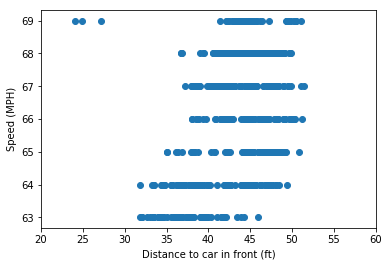

(0.15651654719963951, 8.4074849687178034e-05)


In [79]:
distances = []
speeds = []
my_speeds = []
for fname in filenames:
    if fname in follow_dict:
        distances.append(follow_dict[fname]['distance'])
        speeds.append(follow_dict[fname]['speed'])
        my_speeds.append(speed_dict[fname])
        #speeds.append(np.round(follow_dict[fname]['speed']))

print len(distances)
#plt.scatter(distances, speeds)
plt.scatter(distances, my_speeds)
plt.xlabel('Distance to car in front (ft)')
plt.xlim([20, 60])
plt.ylabel('Speed (MPH)')
plt.show()
print pearsonr(distances, speeds)
#print pearsonr(distances, my_speeds)

In [80]:
626/903.

0.6932447397563677